## Level 1: Navigating the Cartesian Plane 

Utilize the programming prowess to command RoboRig to navigate to a specified position on the Cartesian plane. Armed with the knowledge of kinematics, you must guide RoboRig through the intricate pathways of the plane, ensuring it reaches the designated destination flawlessly. The desired destination point on the Cartesian plane must be clearly indicated, allowing easy visualization of the target location. This ensures that participants can accurately assess whether RoboRig's end effector has reached the intended position or not.

### Designated Destination
(-1.75, 2.0)

### Judging Criteria
- **Accuracy of Positioning:** 6 points
- **Code:** 4 points


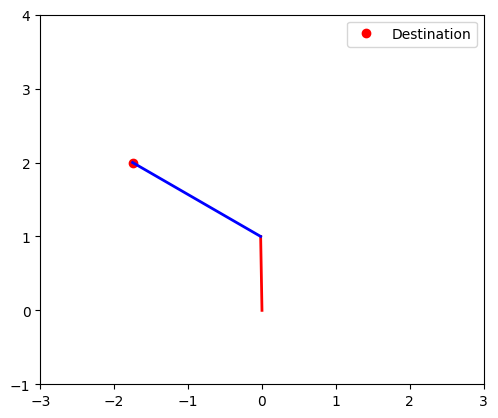

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the destination coordinate
destination = (-1.75, 2)

# Define the lengths of the links
l1 = 1
l2 = 2

# Calculate the inverse kinematics to find the joint angles
def inverse_kinematics(x, y):
    D = (x**2 + y**2 - l1**2 - l2**2) / (2 * l1 * l2)
    if -1 <= D <= 1:
        theta2 = np.arctan2(np.sqrt(1 - D**2), D)
        theta1 = np.arctan2(y, x) - np.arctan2(l2 * np.sin(theta2), l1 + l2 * np.cos(theta2))
        return theta1, theta2
    else:
        raise ValueError("Destination point is out of reach")

# Calculate the joint angles for the destination coordinate
theta1, theta2 = inverse_kinematics(*destination)

# Create the plot
fig, ax = plt.subplots()
ax.set_xlim(-3, 3)
ax.set_ylim(-1, 4)
ax.set_aspect('equal', 'box')

# Plot the destination coordinate
ax.plot(*destination, 'ro', label='Destination')

# Plot the initial configuration of the arm
x1_init = l1 * np.cos(theta1)
y1_init = l1 * np.sin(theta1)
x2_init = x1_init + l2 * np.cos(theta1 + theta2)
y2_init = y1_init + l2 * np.sin(theta1 + theta2)
link1, = ax.plot([0, x1_init], [0, y1_init], 'r-', lw=2)
link2, = ax.plot([x1_init, x2_init], [y1_init, y2_init], 'b-', lw=2)

plt.legend()
plt.show()